In [1]:
setwd("..")

In [59]:
require(sp)
require(magrittr)
library(tidyr)
library(dplyr)
require(RColorBrewer)
library(ggplot2)
library(reshape)
library(patchwork)

load("scripts/worldmap.Rdata", verbose = T)
load("data/ba_mon_clim_masked_df.Rdata", verbose = T)
load("data/biome_dataframe_masked.Rdata", verbose = T)
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeason_def_2.Rdata", verbose = T)

load('corrDfAnnualClusV2.Rdata', verbose = T)
load('corrDfAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfAnnualClusLag3V2.Rdata', verbose = T)

load('corrDfDeltaAnnualClusV2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag3V2.Rdata', verbose = T)

load('ModelData/models_results_per_cluster_with_delta_no_persistence_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag1_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag2_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag3_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag0123_v2.Rdata', verbose = T)

Loading objects:
  coast.lines
Loading objects:
  df_masked
  masked_coords
Loading objects:
  legend.biomes
  biomes
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeason_def_2
Loading objects:
  corr.df
Loading objects:
  corr.df.lag.1
Loading objects:
  corr.df.lag.2
Loading objects:
  corr.df.lag.3
Loading objects:
  corr.df.delta
Loading objects:
  corr.df.delta.1
Loading objects:
  corr.df.delta.2
Loading objects:
  corr.df.delta.3
Loading objects:
  table
Loading objects:
  table.deltas.Lag.1
Loading objects:
  table.deltas.Lag.2
Loading objects:
  table.deltas.Lag.3
Loading objects:
  table.deltas.Lag.0123


In [60]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

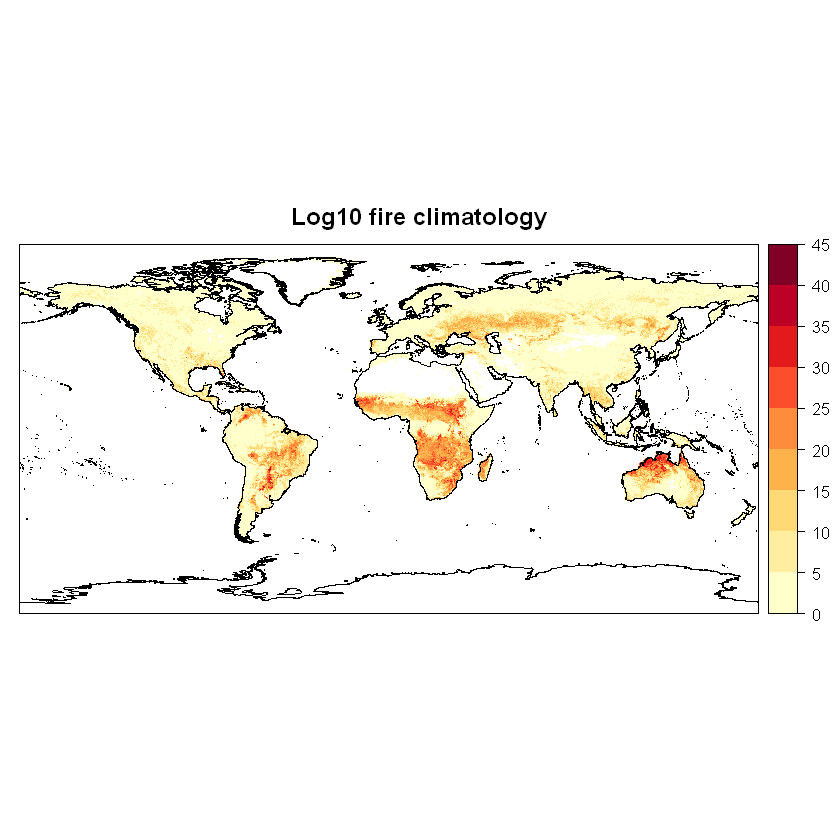

In [4]:
# Plot of the fire climatology

#pdf(file="Figures/Figure1a.pdf")

arg.list <- list(col.regions = brewer.pal(9, 'YlOrRd'), at = seq(0, 45, 5),
                 main = paste("Log10 fire climatology"))

df1 <- cbind.data.frame(masked_coords, apply(log10(df_masked + 1), 1, sum))
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
#arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

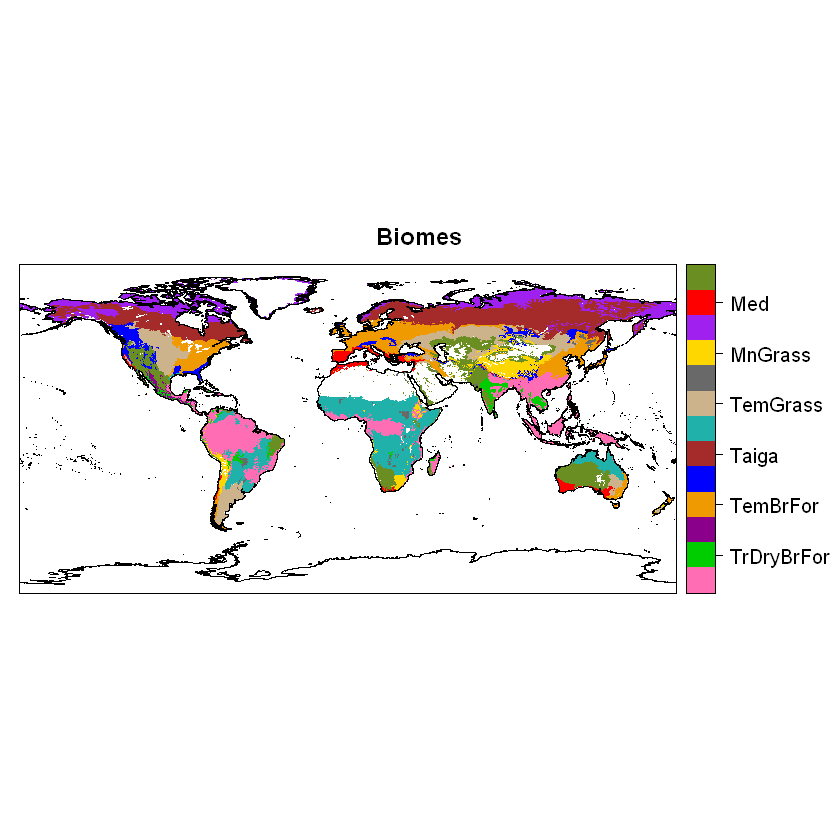

In [13]:
# Plot of the biomes

#pdf(file="Figures/Figure1b.pdf")

arg.list <- list(col.regions=c('hotpink1', 'green3', 'darkmagenta', 'orange2', 'blue', 'brown', 'lightseagreen', 'navajowhite3',
                                 'grey41', 'gold1', 'purple', 'red', 'olivedrab'),
                 at = seq(0, 13, 1), main = "Biomes", 
                 colorkey = list(labels = list(labels = legend.biomes$Label[seq(2,12,2)], width = 1, cex = 1),
                                 at = seq(0.5,13.5,1)))
v <- as.numeric(fireSeason_def_2$BIOME)
v[which(v %in% c(14,98,99))] = NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

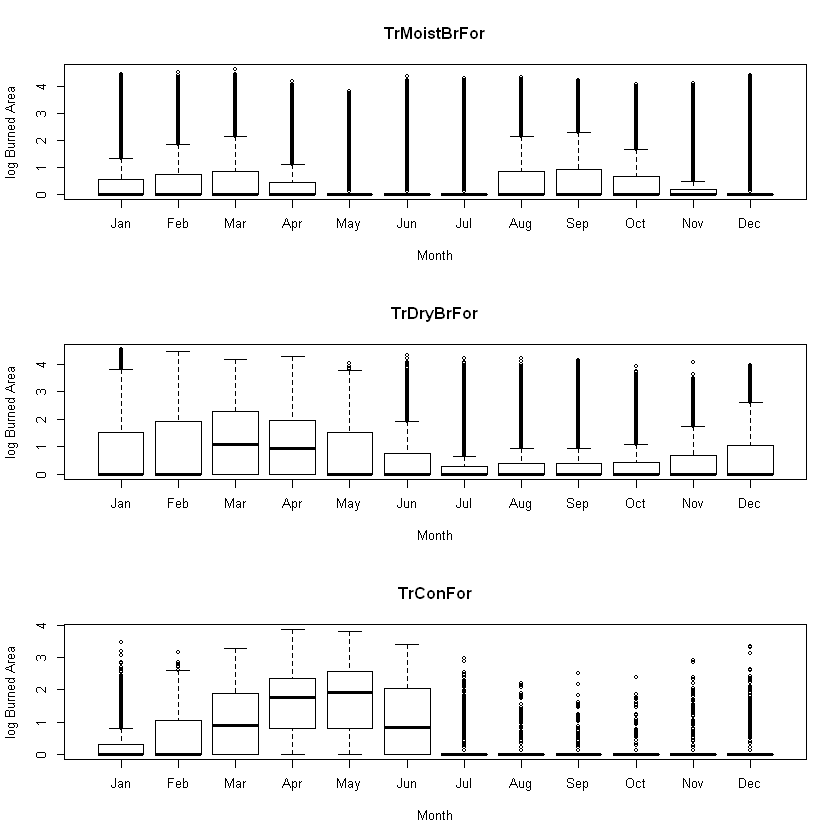

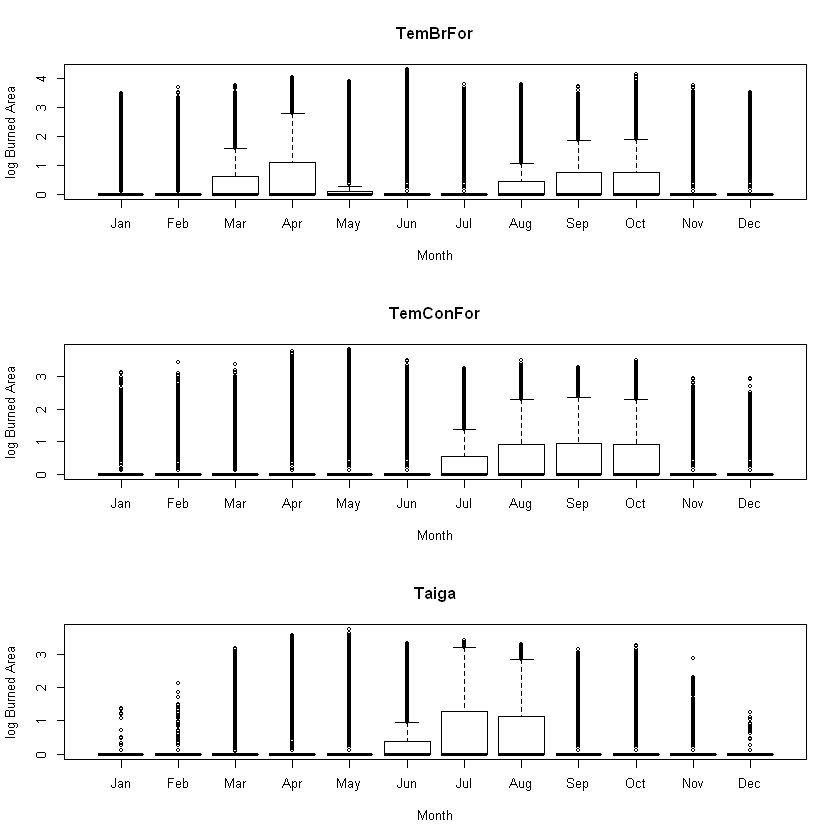

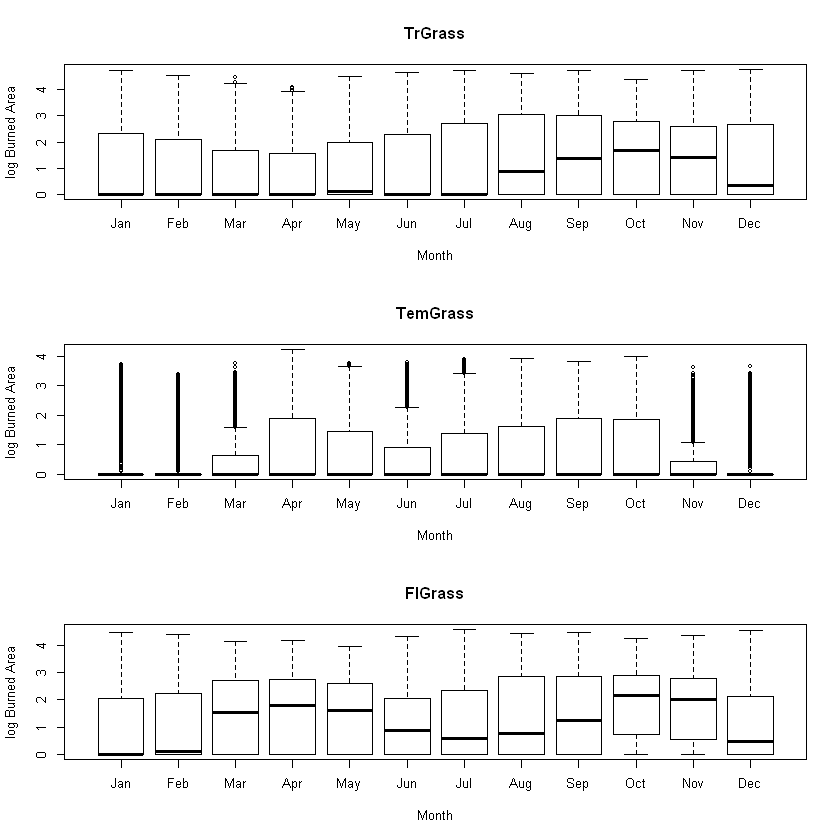

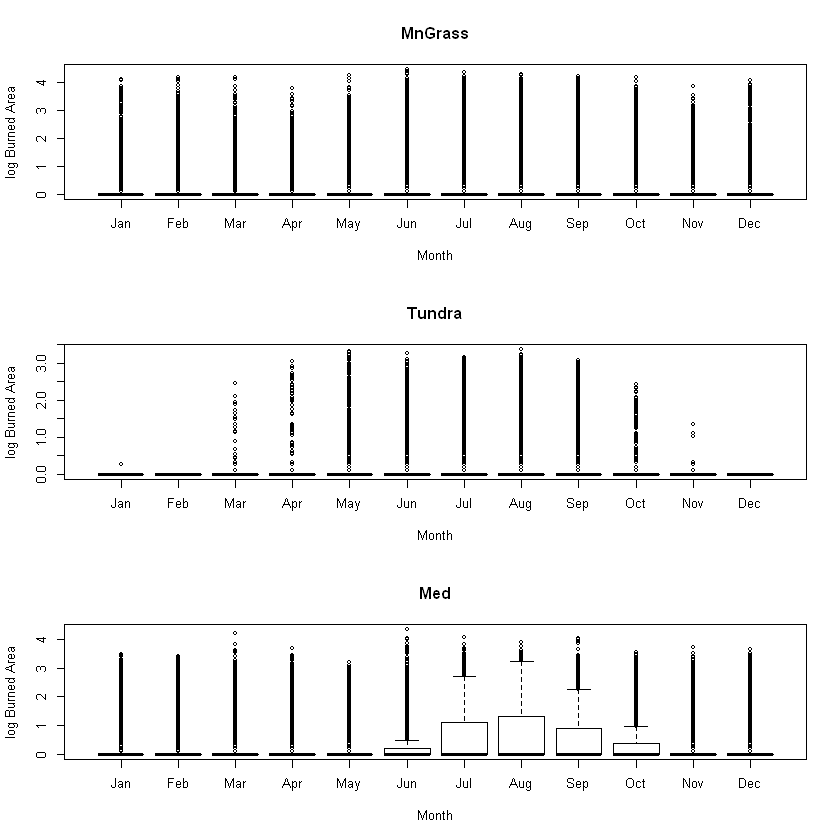

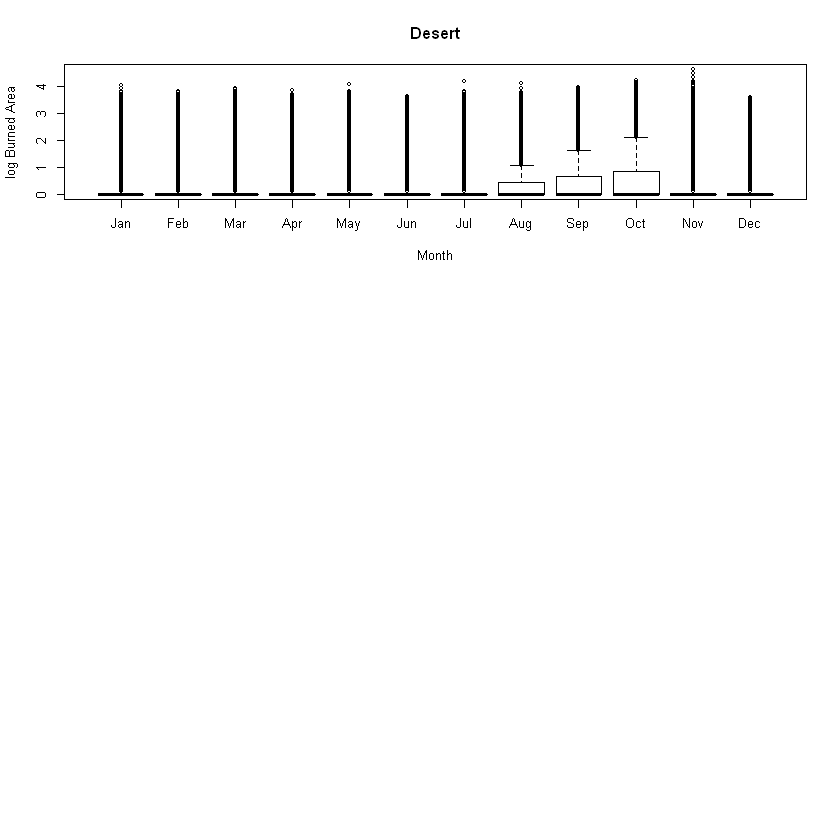

In [20]:
# Boxplots of the burned area distribution per month and biome

df.log10 = log10(df_masked + 1)
names(df.log10) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
#jpeg(file="Figures/Figure2_part1.jpeg")

par(mfrow = c(3,1))
for (i in 1:3){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part2.jpeg")

par(mfrow = c(3,1))
for (i in 4:6){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part3.jpeg")

par(mfrow = c(3,1))
for (i in 7:9){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part4.jpeg")

par(mfrow = c(3,1))
for (i in 10:12){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part5.jpeg")

par(mfrow = c(3,1))
for (i in 13){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

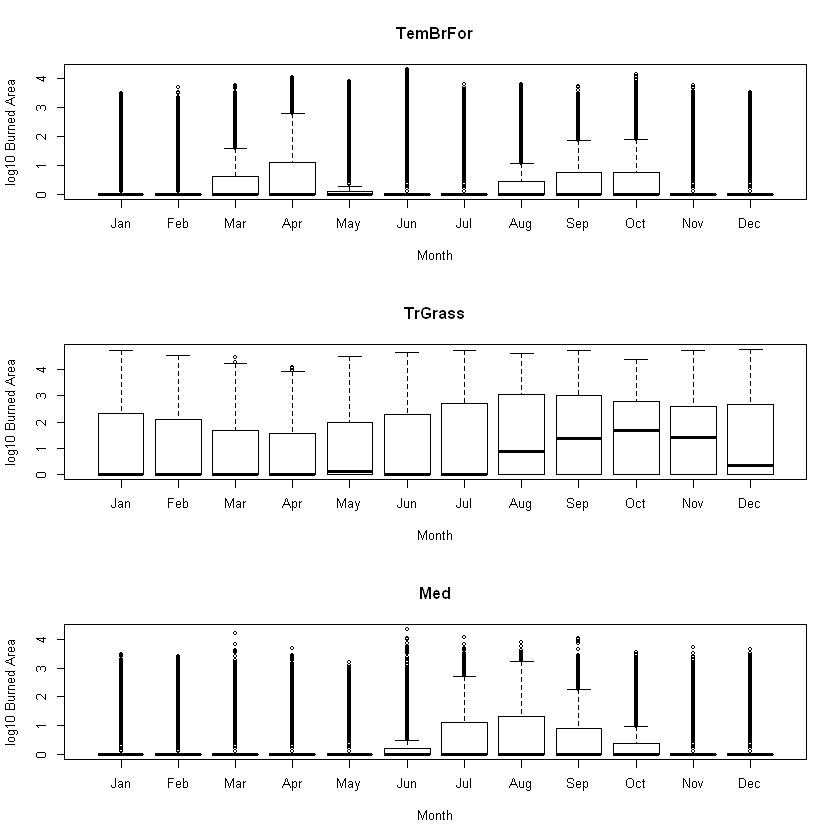

In [74]:
# Boxplots of the interesting biomes

df.log10 = log10(df_masked + 1)
names(df.log10) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
#pdf(file="Figures/Figure2_boxplots.pdf")

par(mfrow = c(3,1))
for (i in c(4,7,12)){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log10 Burned Area')
}

#dev.off()

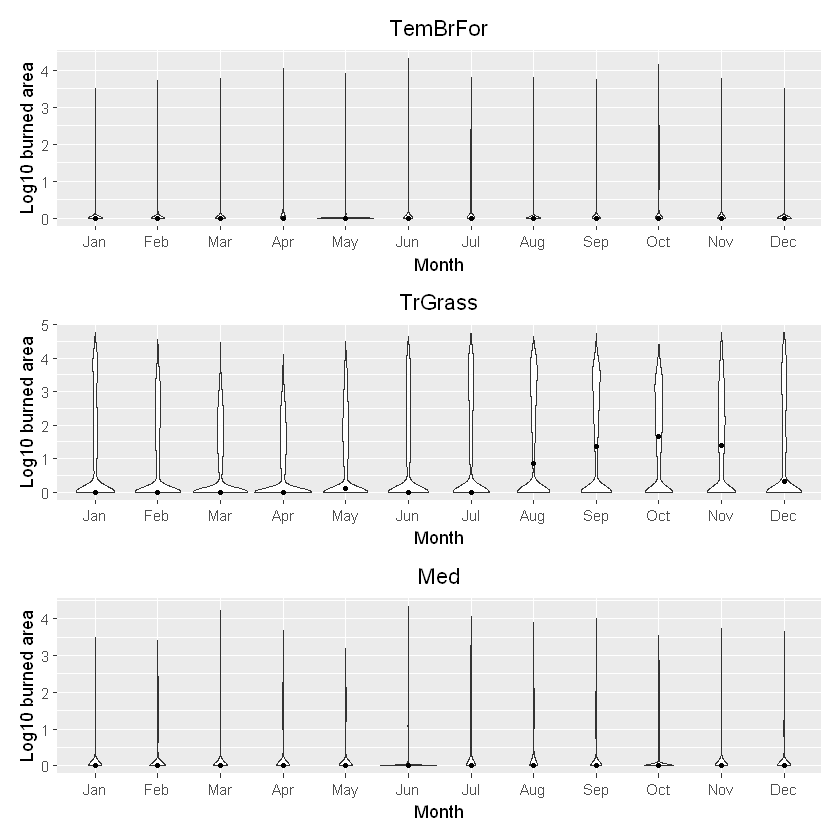

In [72]:
# Violin plots of the interesting biomes

df.log10 = log10(df_masked + 1)
names(df.log10) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

#pdf(file="Figures/Figure2_violins.pdf")
p = list()
for (i in c(4,7,12)){
    ind.biome = which(biomes$BIOME == i)
    m1 <- melt(df.log10[ind.biome,], id = c())
    p[[i]] <-ggplot(m1, aes(x=variable, y=value)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + xlab('Month') + ylab('Log10 burned area') + ggtitle(legend.biomes$Label[i]) + theme(plot.title = element_text(hjust = 0.5))
}

p[[4]] / p[[7]] / p[[12]]
#dev.off()

In [14]:
# Spatial distribution of clusters

fireSeason_def_2$bi.cl = paste(as.integer(fireSeason_def_2$BIOME),fireSeason_def_2$cl, sep = ',')
fireSeason_def_2$bi.cl = as.factor(fireSeason_def_2$bi.cl)
#str(fireSeason_def_2)
# Sort the levels of the factor
fireSeason_def_2$bi.cl = factor(fireSeason_def_2$bi.cl, levels = c('1,1', '1,2', '1,3', '1,4', '1,5', '1,6', '2,1', '2,2',
                                                                   '2,3', '2,4', '2,5', '2,6', '3,1', '3,2', '4,1', '4,2',
                                                                   '4,3', '4,4', '4,5', '5,1', '5,2', '5,3', '6,1', '6,2',
                                                                   '6,3', '7,1', '7,2', '7,3', '7,4', '7,5', '7,6', '8,1',
                                                                   '8,2', '8,3', '8,4', '9,1', '9,2', '9,3', '9,4', '9,5',
                                                                   '9,6', '9,7', '10,1', '10,2','10,3', '11,1', '11,2', '12,1',
                                                                   '12,2', '12,3', '12,4', '13,1', '13,2', '13,3', '13,4',
                                                                   '14,NA', '15,NA', '16,NA', 'NA,NA'))


colors.def = vector(mode = "character", length = length(levels(fireSeason_def_2$bi.cl)))

colors <- col2rgb(c('hotpink1', 'green3', 'darkmagenta', 'orange2', 'blue', 'brown', 'lightseagreen', 'navajowhite3',
                                 'grey41', 'gold1', 'purple', 'red', 'olivedrab'))
# Make the new palette
i = 0
for (biome in 1:13){
    clusters = sort(unique(fireSeason_def_2[which(fireSeason_def_2$BIOME == biome),]$cl))

    for (cl in 1:length(clusters)){
        i = i + 1
        colors.def[i] = rgb(colors[1,biome], colors[2,biome], colors[3,biome],
                            alpha = (length(clusters) + 1 - cl) * 255 / length(clusters), maxColorValue = 255)
    }
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

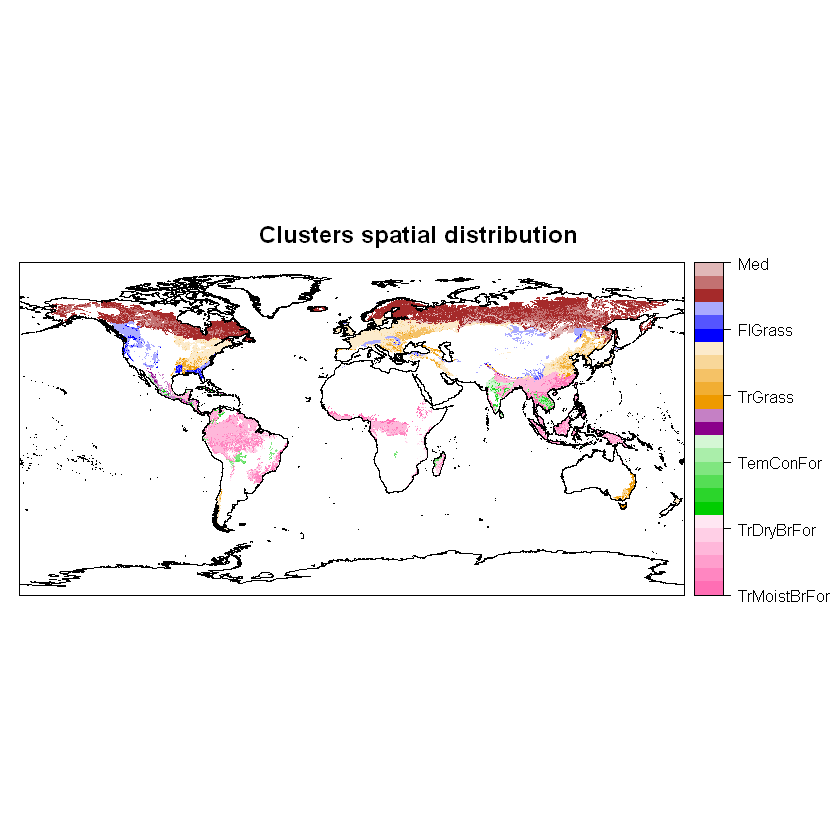

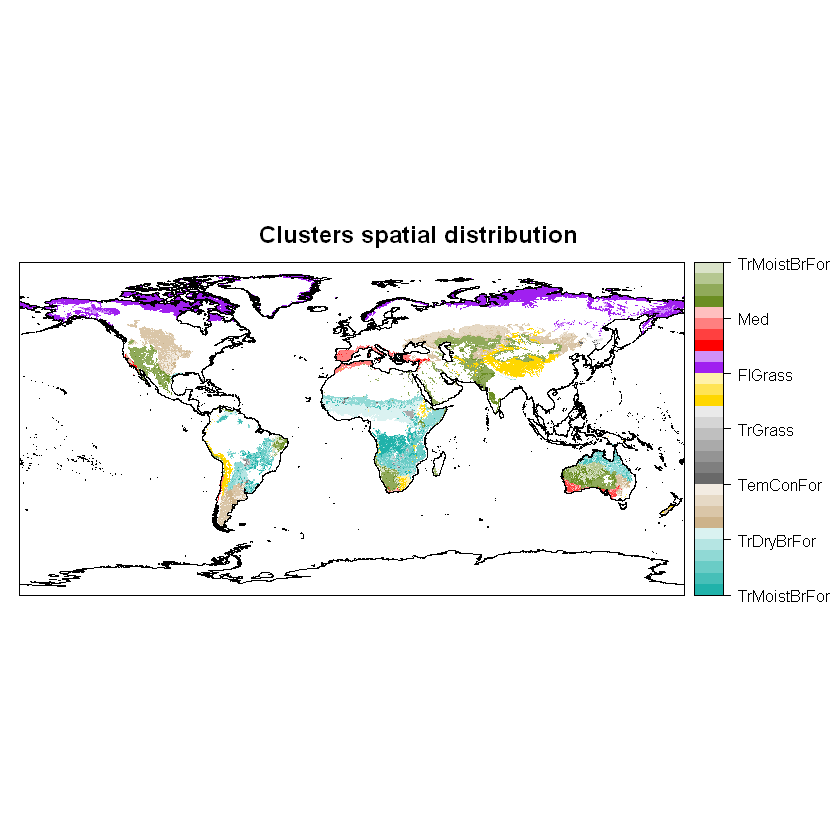

In [16]:
#pdf(file="Figures/Figure3_part1.pdf")

arg.list <- list(col.regions = colors.def[1:25],
                 at = seq(0,25,1), main = "Clusters spatial distribution",
                 colorkey = list(labels = list(labels = legend.biomes$Label[c(1,2,5,7,9,12)])))                 

v <- rep(NA, nrow(df_masked))
for (biome in 1:6){
    v[which(fireSeason_def_2$BIOME == biome)] <- fireSeason_def_2$bi.cl[which(fireSeason_def_2$BIOME == biome)]
}

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

#pdf(file="Figures/Figure3_part2.pdf")

arg.list <- list(col.regions = colors.def[26:55],
                 at = seq(25,55,1), main = "Clusters spatial distribution",
                 colorkey = list(labels = list(labels = legend.biomes$Label[c(1,2,5,7,9,12)])))

arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)

v <- rep(NA, nrow(df_masked))
for (biome in 7:13){
    v[which(fireSeason_def_2$BIOME == biome)] <- fireSeason_def_2$bi.cl[which(fireSeason_def_2$BIOME == biome)]
}

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

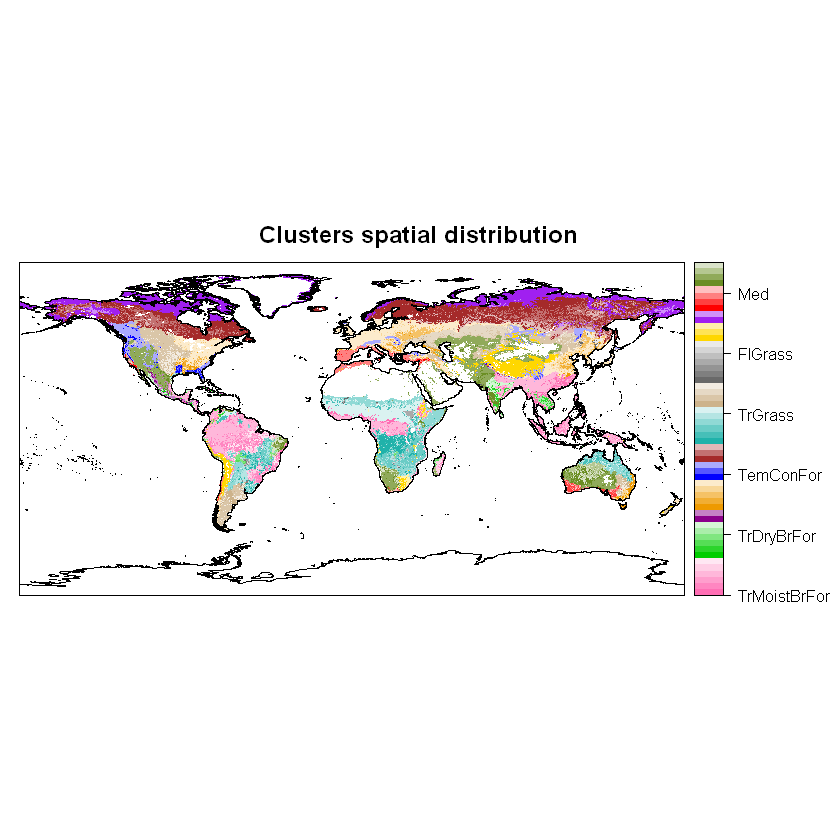

In [95]:
#pdf(file="Figures/Figure3.pdf")

arg.list <- list(col.regions = colors.def[1:55],
                 at = seq(0,55,1), main = "Clusters spatial distribution",
                 colorkey = list(labels = list(labels = legend.biomes$Label[c(1,2,5,7,9,12)])))                 

v <- rep(NA, nrow(df_masked))
for (biome in 1:13){
    v[which(fireSeason_def_2$BIOME == biome)] <- fireSeason_def_2$bi.cl[which(fireSeason_def_2$BIOME == biome)]
}

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

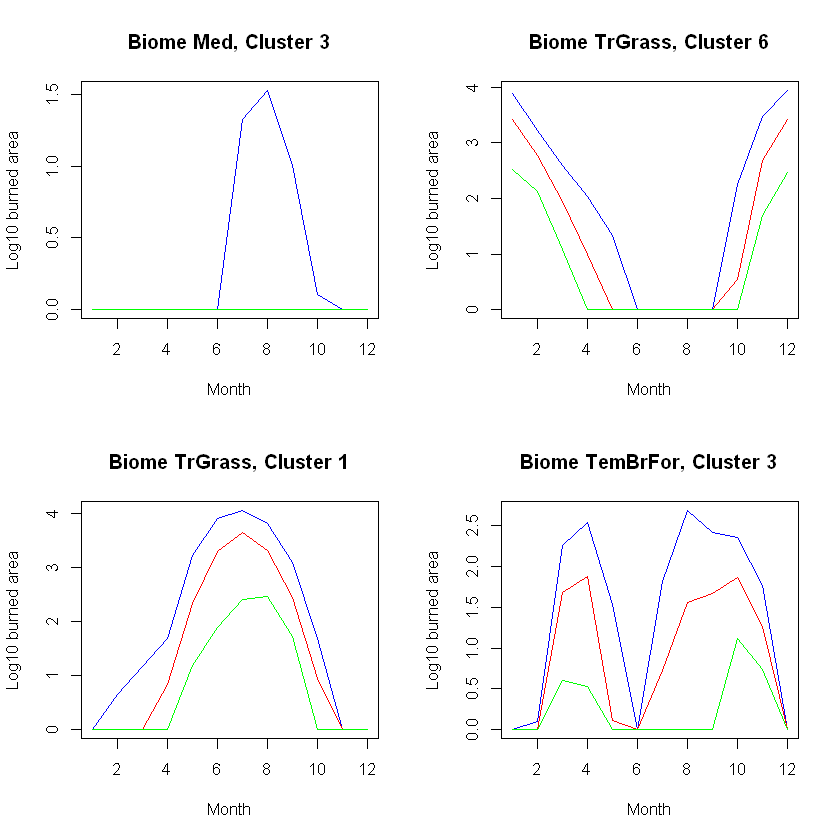

In [11]:
# Fire seasons

#pdf(file="Figures/Figure4.pdf")

plot.quantiles <- function(fireSeasons, df, biome, cluster, legend.biomes, title = '') {
      
    ind.coords = which(fireSeasons$BIOME == biome & fireSeasons$cl == cluster)

    med = apply(df[ind.coords,], 2, median, na.rm = T)
    p25 = apply(df[ind.coords,], 2, quantile, prob = 0.25, na.rm = T)
    p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
    
    if (title == ''){
        title = paste('Biome ', legend.biomes$Label[biome], ', Cluster ', toString(cluster), sep = '')
    }
    
    plot(p75, col = 'blue', type = 'l', xlab = "Month", ylab = "Log10 burned area", main = title)
    lines(1:12, med, col = "red")
    lines(1:12, p25, col = "green") 
}


par(mfrow = c(2,2))

plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 12, 3, legend.biomes)
plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 7, 6, legend.biomes)
plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 7, 1, legend.biomes)
plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 4, 3, legend.biomes)
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

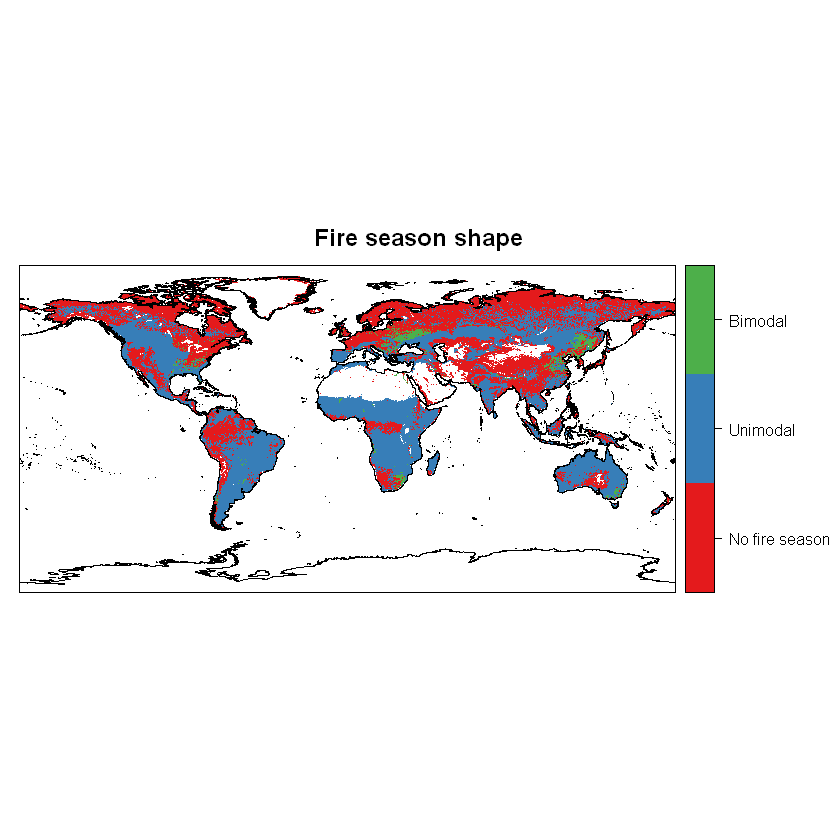

In [13]:
# Fire season shape

#pdf(file="Figures/Figure5.pdf")

arg.list <- list(col.regions = brewer.pal(3, 'Set1'),
                 at = seq(-1, 2, 1), main = "Fire season shape",
                 colorkey = list(labels = list(labels = c("No fire season", "Unimodal", "Bimodal"),
                                               at = c(-.5,.5,1.5))))
v <- fireSeason_def_2$form
v[which(fireSeason_def_2$form == 3)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

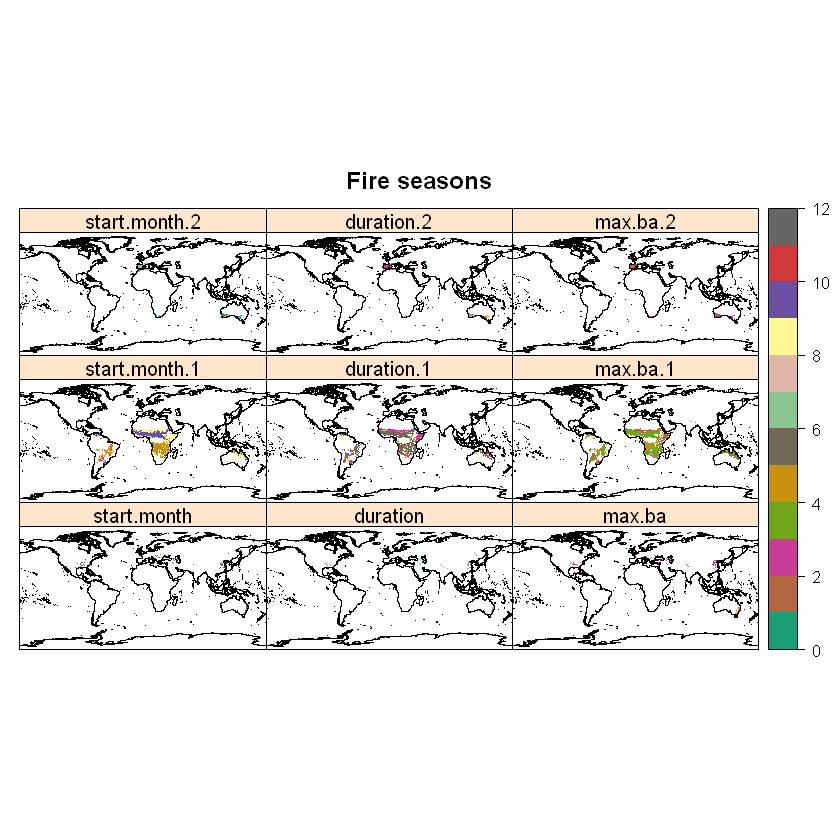

In [83]:
# Fire seasons (unimodal clusters)

plot.fire.seasons <- function (fireSeasons, df, biomes, form, title = 'Fire seasons'){
    df1 = masked_coords
    
    for (biome in biomes){

        start.month <- numeric(nrow(df))

        start.month[-which(fireSeasons$form == form)] <- NA
        start.month[which(fireSeasons$form == form)] <- fireSeasons$start.1[which(fireSeasons$form == form)]
        start.month[-which(fireSeasons$BIOME == biome)] <- NA


        duration <- numeric(nrow(df))

        duration[-which(fireSeasons$form == form)] <- NA

        duration[which(fireSeasons$form == form)] <- fireSeasons$end.1[which(fireSeasons$form == form)] - fireSeasons$start.1[which(fireSeasons$form == form)]
        duration[which(fireSeasons$form == form)][which(duration[which(fireSeasons$form == form)]<0)] = 12 - abs(duration[which(fireSeasons$form == form)][which(duration[which(fireSeasons$form == form)]<0)])
        duration[which(fireSeasons$form == form)] = duration[which(fireSeasons$form == form)] + 1
        duration[-which(fireSeasons$BIOME == biome)] <- NA

        max.ba <- rep(NA, nrow(df))
        clusters = sort(unique(fireSeasons[which(fireSeasons$form == form
                                                 & fireSeasons$BIOME == biome),]$cl))
        n.clusters = length(clusters)

        for (cl in 1:n.clusters){
            clus = clusters[cl]  
            ind.coords = which(fireSeasons$form == form & fireSeasons$BIOME == biome & fireSeasons$cl == clus)

            p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
            max.ba[ind.coords] = max(p75, na.rm = T)
        }

        df1 <- cbind.data.frame(df1, start.month, duration, max.ba)    
    }

    arg.list <- list(col.regions = colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent"))), at = seq(0, 12, 1),
                         main = title)

    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[["obj"]] <- df1

    arg.list[["ylim"]] <- c(-90,90)
    arg.list[["xlim"]] <- c(-180,180)
    do.call("spplot", arg.list) %>% print()
}

#pdf(file="Figures/Figure6.pdf")
plot.fire.seasons(fireSeason_def_2, log10(df_masked + 1), c(4,7,12), 1)
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

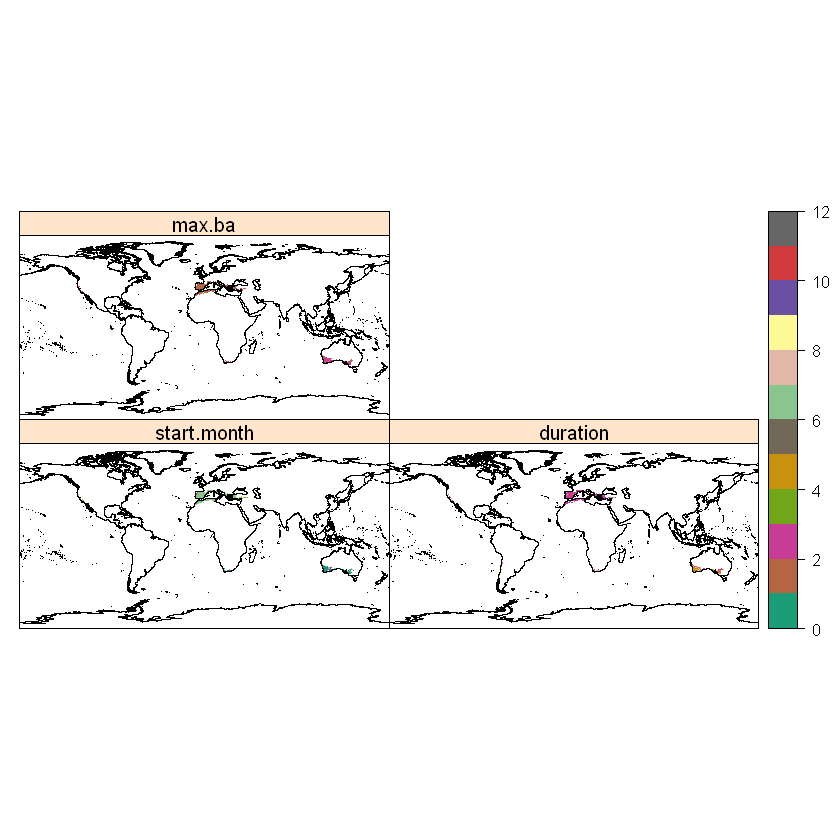

In [82]:
#pdf(file="Figures/Figure6_med.pdf")
plot.fire.seasons(fireSeason_def_2, log10(df_masked + 1), 12, 1, title = legend.biomes$Label[4])
#dev.off()

In [42]:
# Fire seasons (bimodal clusters, main fire seasons)

#pdf(file="Figures/Figure7.pdf")
#plot.fire.seasons(fireSeason_def_2, log1p(df_masked), 2)
#dev.off()

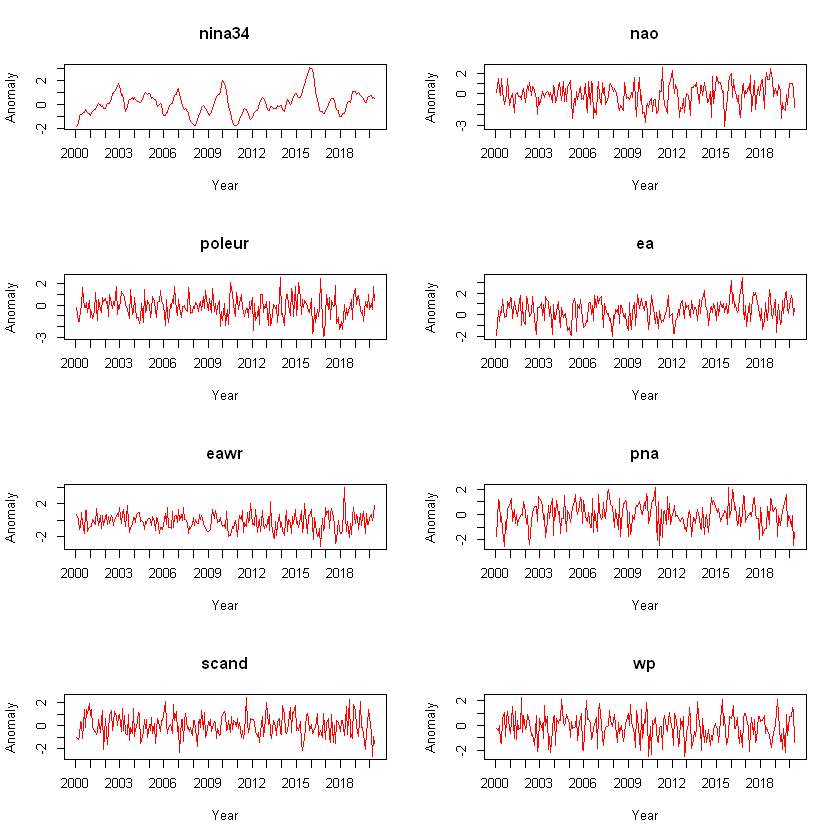

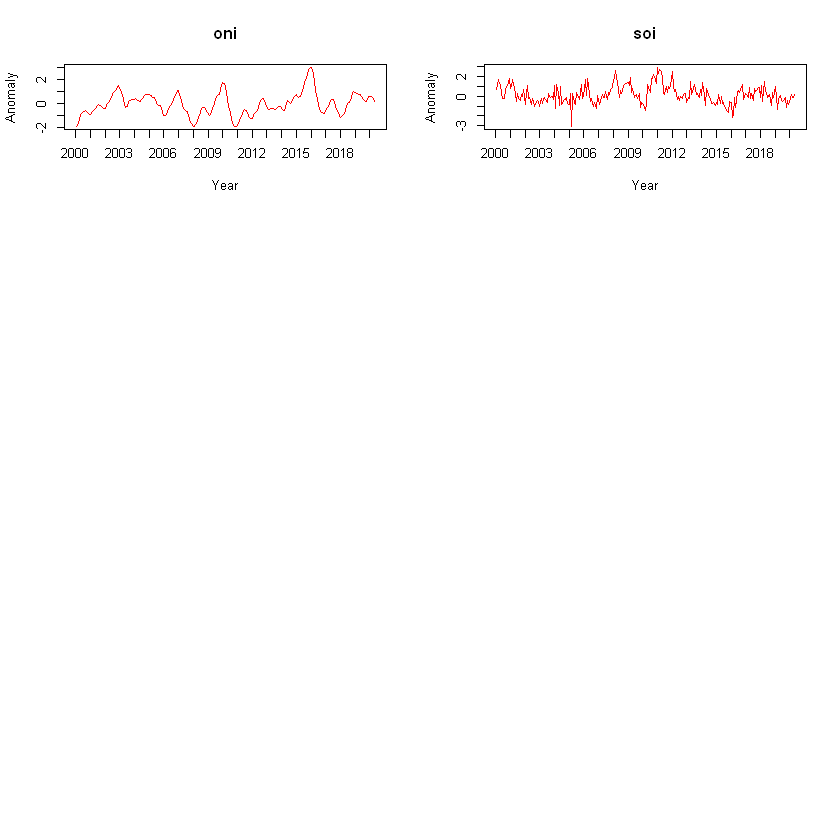

In [25]:
# Cpcs time series

list.cpcs = list(nina34, nao, poleur, ea, eawr, pna, scand, wp, oni, soi)
names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')

#pdf(file="Figures/Figure9_part1.pdf")
par(mfrow = c(4,2))
for (i in 1:8){
    plot(as.vector(t(as.matrix(list.cpcs[[i]][which(list.cpcs[[i]]$Year %in% 2000:2020),-1])))[1:244], type = 'l', xaxt = "n", 
         xlab = 'Year', ylab = 'Anomaly', main = names[i], col = 'red')
    axis(1, at=seq(0,244,12), labels=2000:2020)
}
#dev.off()

#pdf(file="Figures/Figure9_part2.pdf")
par(mfrow = c(4,2))
for (i in 9:10){
    plot(as.vector(t(as.matrix(list.cpcs[[i]][which(list.cpcs[[i]]$Year %in% 2000:2020),-1])))[1:244], type = 'l', xaxt = "n", 
         xlab = 'Year', ylab = 'Anomaly', main = names[i], col = 'red')
    axis(1, at=seq(0,244,12), labels=2000:2020)
}
#dev.off()

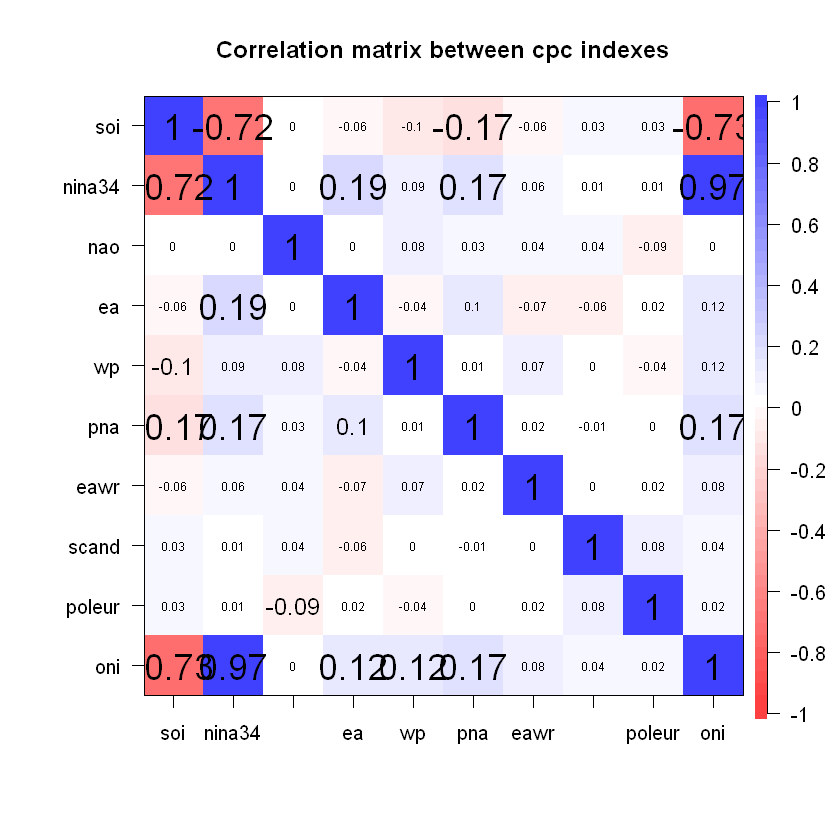

In [27]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')

#pdf(file="Figures/Figure10.pdf")
corPlot(M, cex = 1.2, main = "Correlation matrix between cpc indexes")
#dev.off()

In [33]:
ind = c()
fireSeasons = fireSeason_def_2
for (biome in 1:13){
    clusters = sort(unique(fireSeasons[which(fireSeasons$BIOME == biome),]$cl))
    n.clusters = length(clusters)

    for (cl in 1:n.clusters){
        clus = clusters[cl]  
        ind.coords = which(fireSeasons$BIOME == biome & fireSeasons$cl == clus)
        ind = c(ind, ind.coords[1])
    }
}

In [56]:
df = corr.df[ind,3:4]
colnames(df) = c('cor', 'pvalue')

for (i in seq(5,17,2)){
    df.0 = corr.df.delta[ind,i:(i+1)]
    colnames(df.0) = c('cor', 'pvalue')
    df.1 = corr.df.delta.1[ind,i:(i+1)]
    colnames(df.1) = c('cor', 'pvalue')
    df.2 = corr.df.delta.2[ind,i:(i+1)]
    colnames(df.2) = c('cor', 'pvalue')
    df.3 = corr.df.delta.3[ind,i:(i+1)]
    colnames(df.3) = c('cor', 'pvalue')
    df = rbind(df, df.0, df.1, df.2, df.3)
}
df = arrange(df, pvalue)
df[110:120,]

,cor,pvalue
67564211,-0.4726347,0.04762351
62241820,0.4690464,0.04957415
6743172,-0.4677968,0.05026742
65264516,0.4657489,0.05141946
85259012,0.4644704,0.05214867
7418282,-0.4618301,0.05367930
6785707,0.4611540,0.05407662
6986764,0.4602203,0.05462899
64088820,0.4573129,0.05637609
70155426,-0.4567779,0.05670210


In [52]:
111*1.05# +-0.46 es el umbral con el 95%

[1] 116.55

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

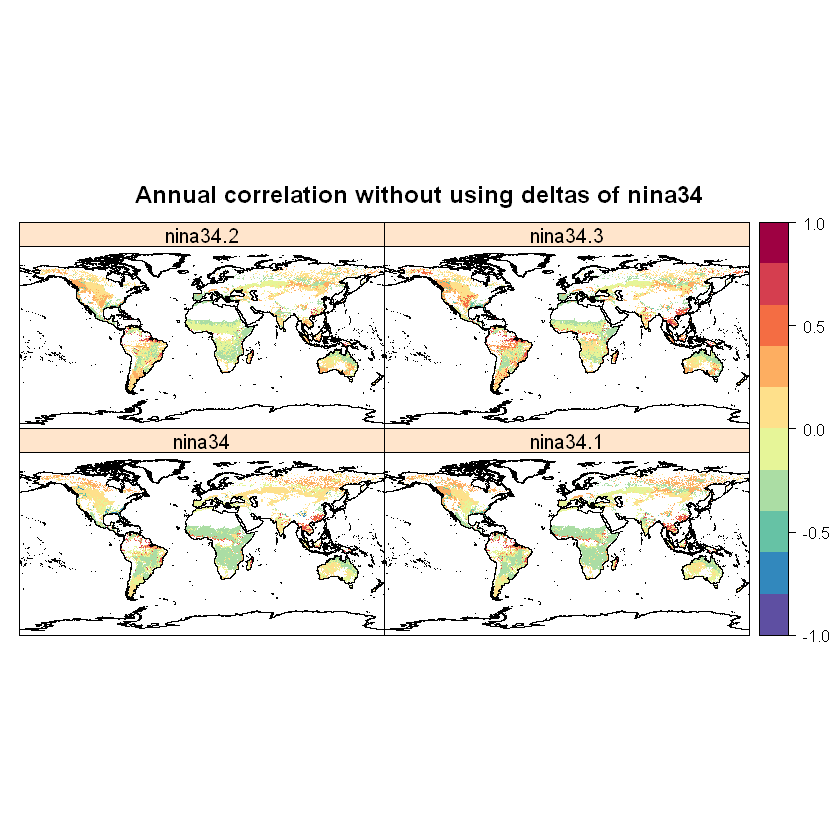

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

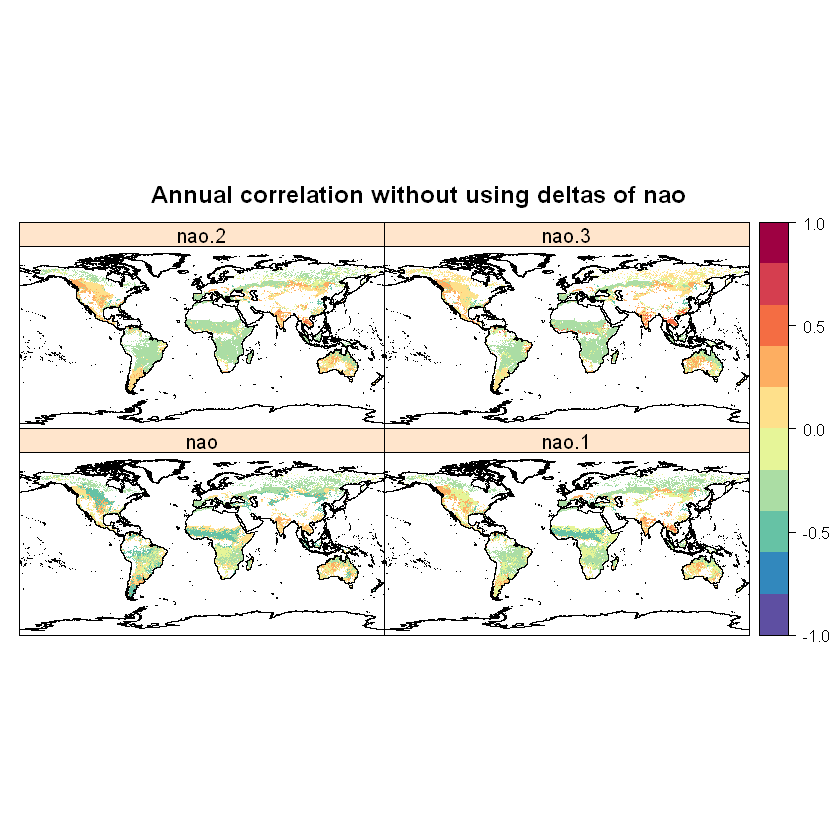

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

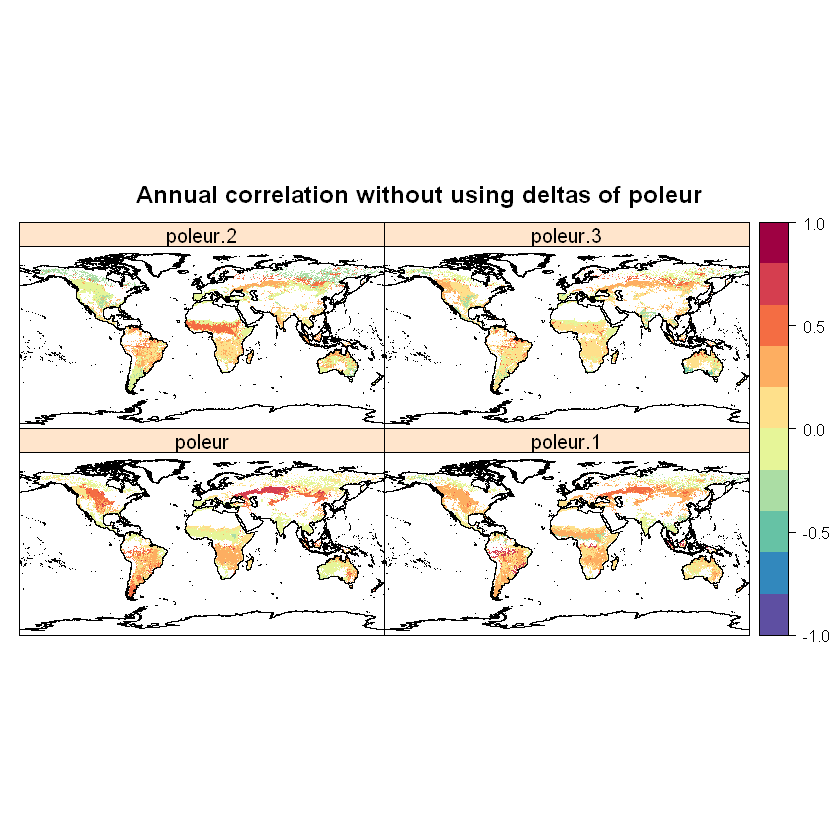

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

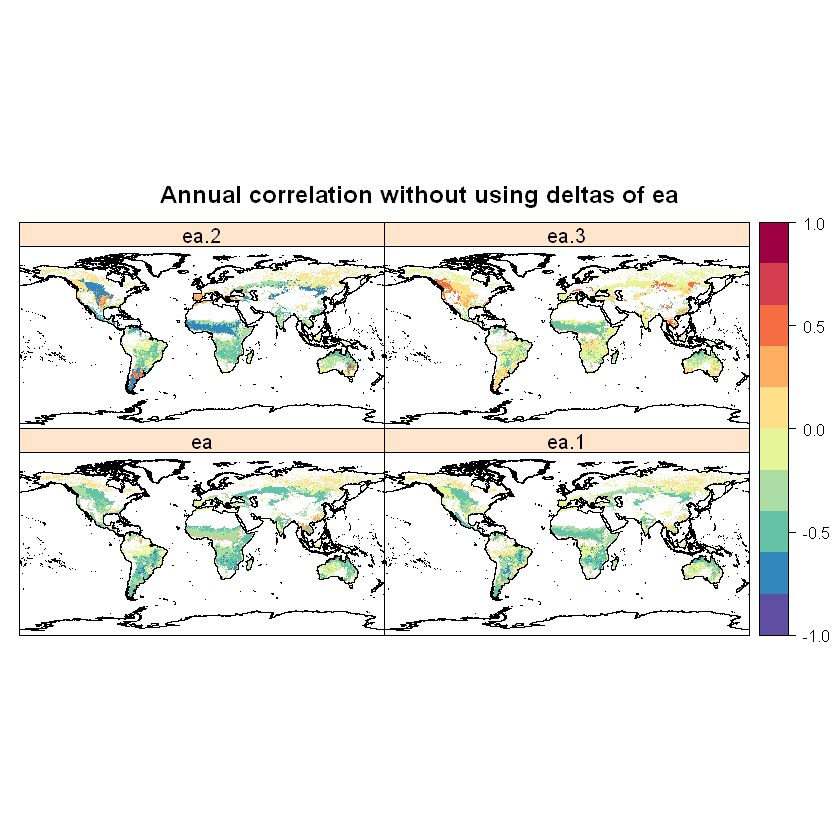

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

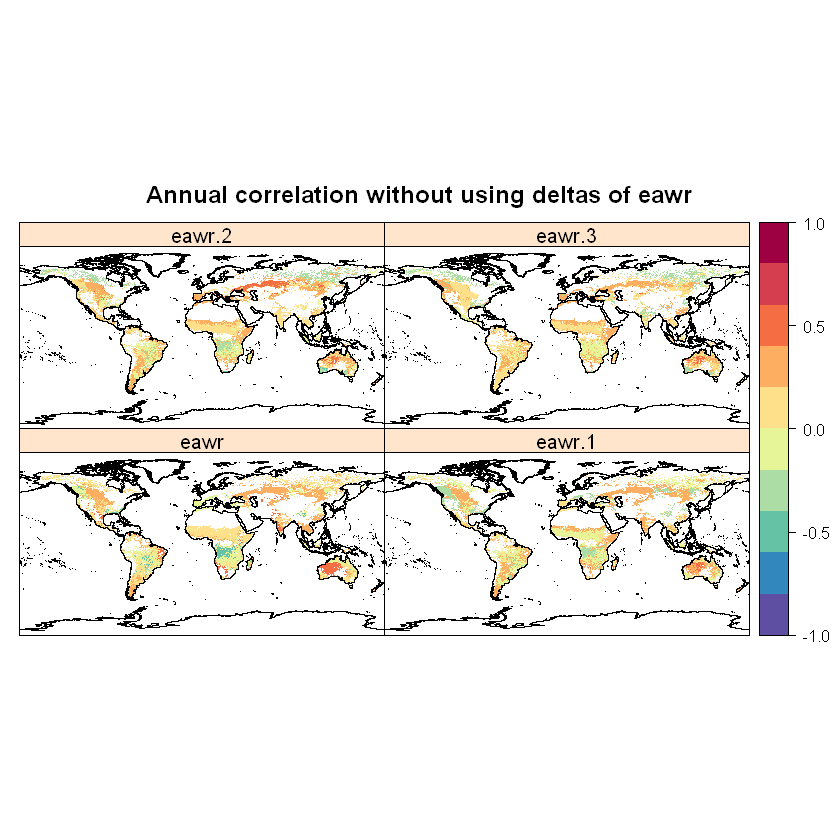

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

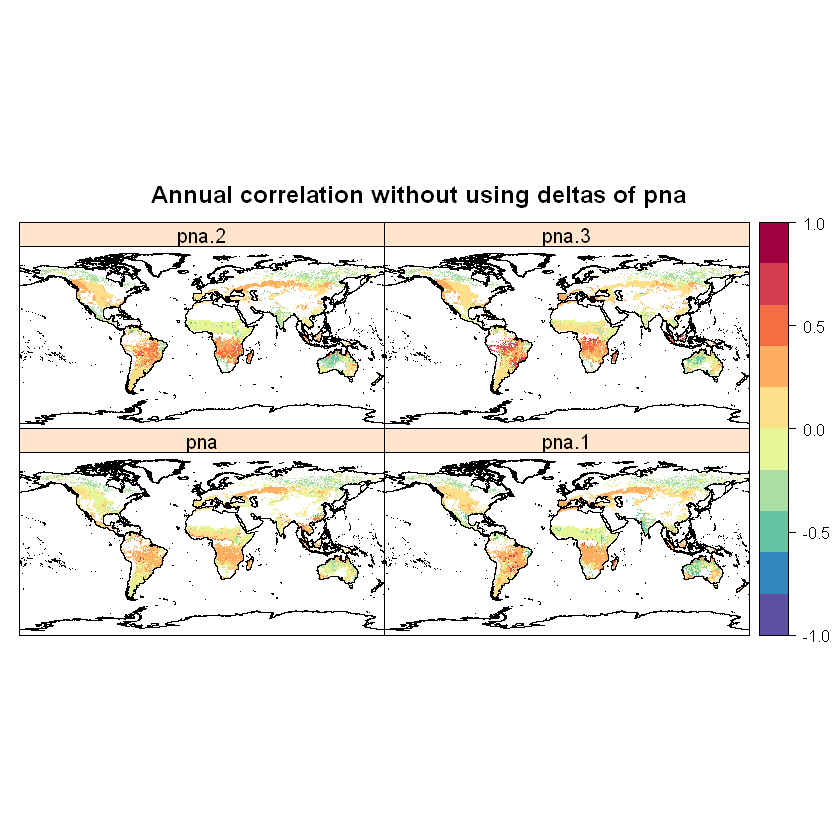

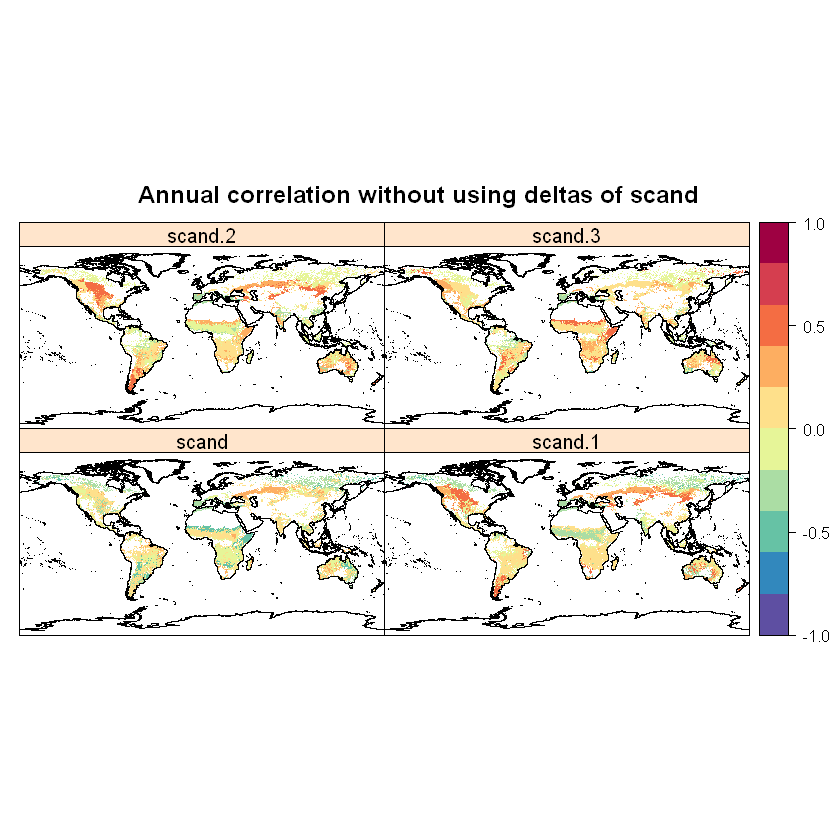

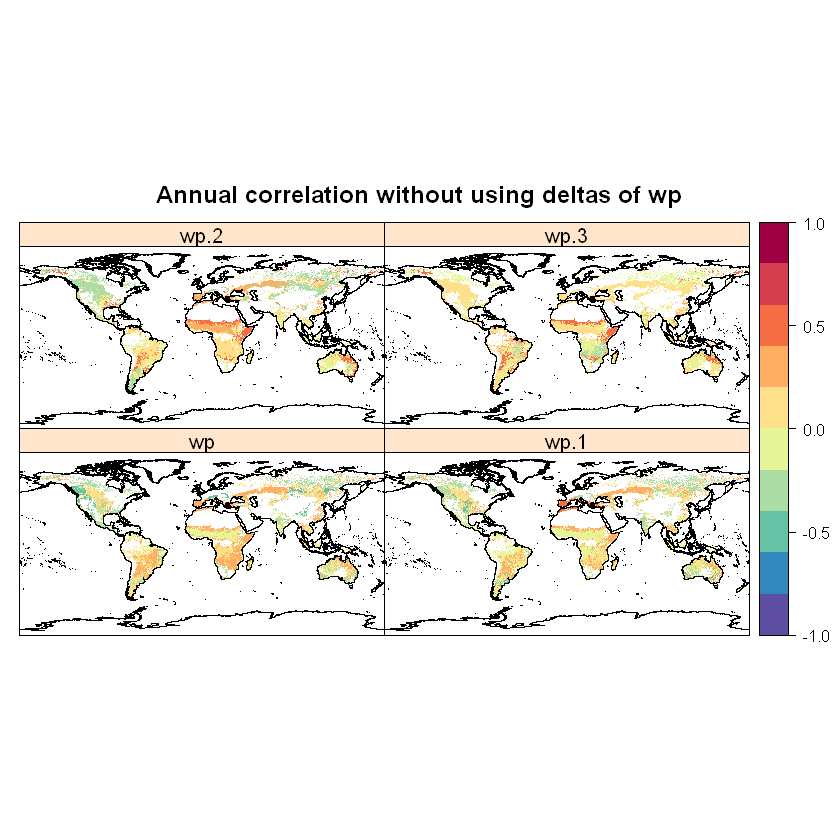

In [14]:
# correlation without deltas

names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')
for (i in 1:8){
    #pdf(paste('Figures/Figure11a_', names[i], '.pdf', sep =''))
    arg.list <- list(col.regions = brewer.pal(11, 'Spectral')[11:1][-6],
                          at = seq(-1, 1, 0.2))
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[["ylim"]] <- c(-90,90)
    arg.list[["xlim"]] <- c(-180,180)
    arg.list[['main']] = paste('Annual correlation without using deltas of', names[i])
    df1 = masked_coords
    
    df1 <- cbind.data.frame(df1, corr.df[2*i+1], corr.df.lag.1[2*i+1], corr.df.lag.2[2*i+1], corr.df.lag.3[2*i+1])    
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    do.call("spplot", arg.list) %>% print()
    #dev.off()
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

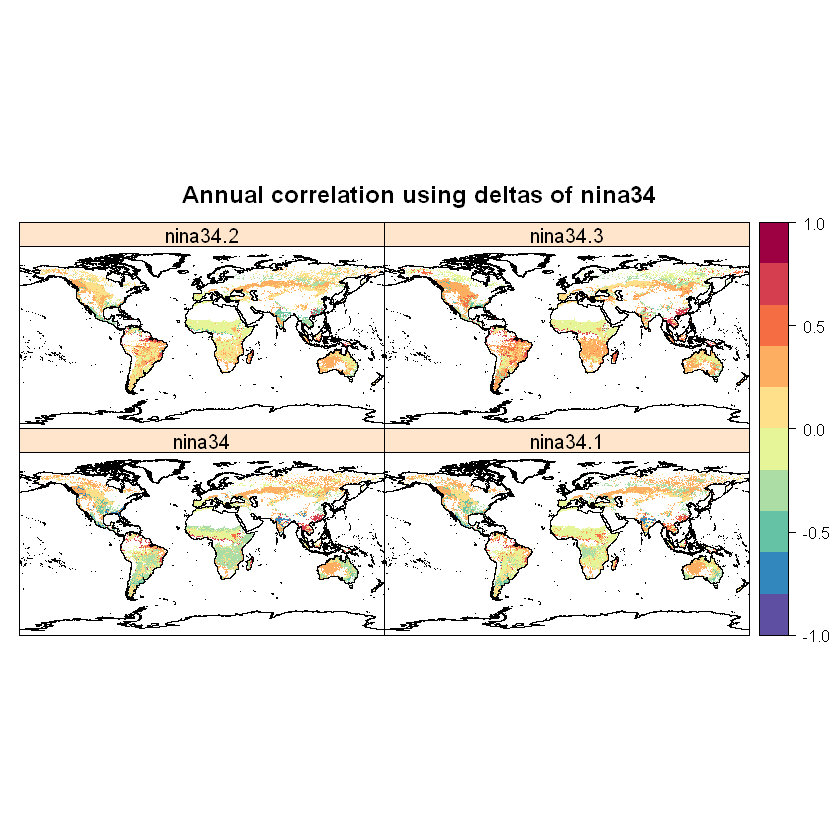

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

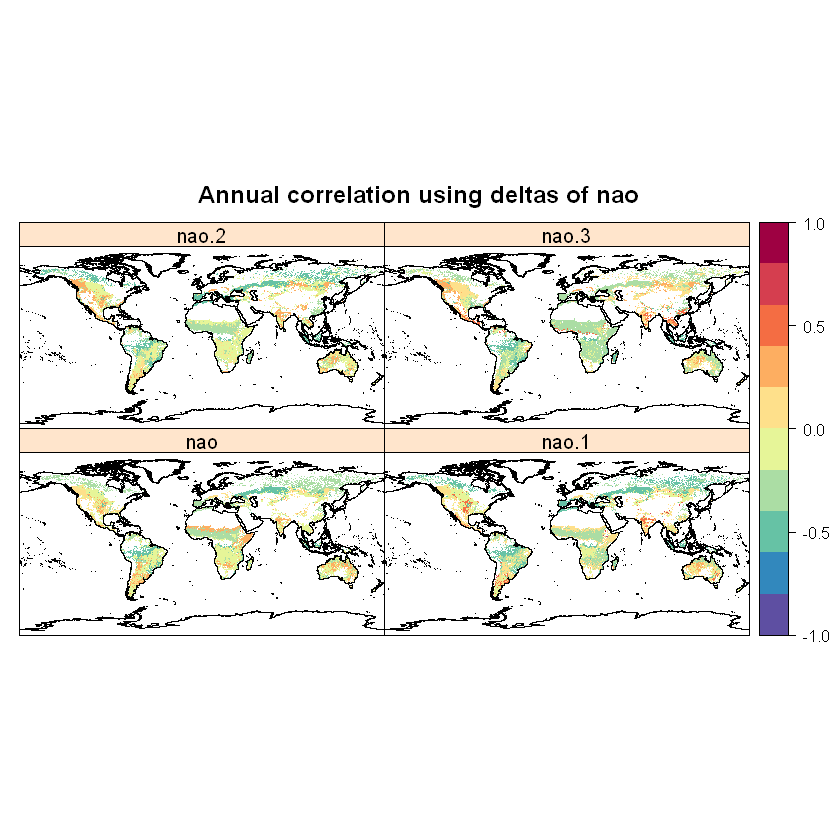

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

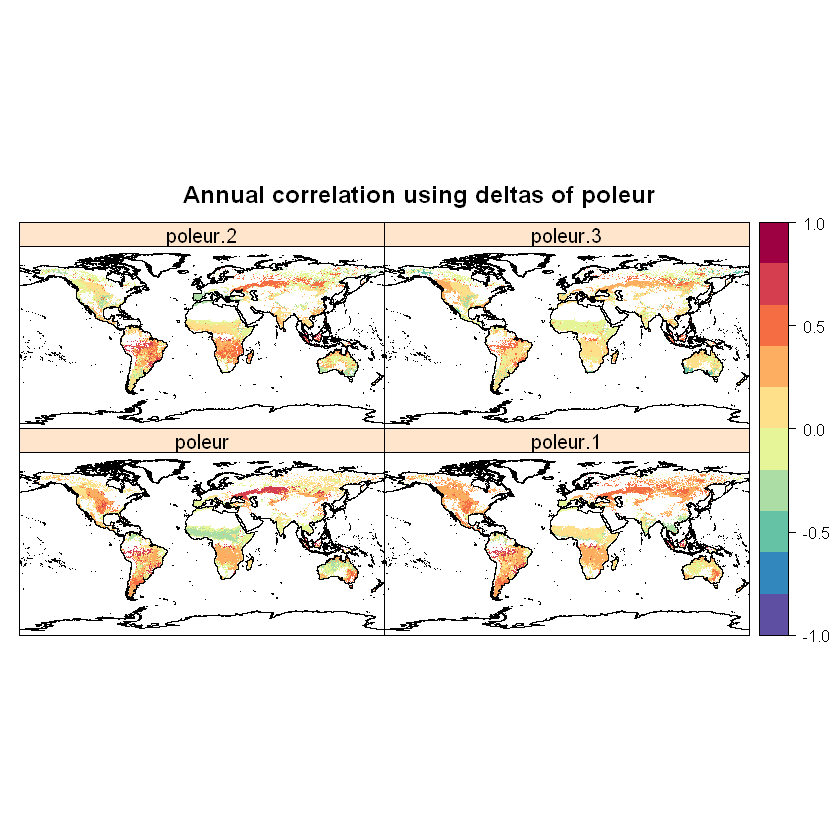

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

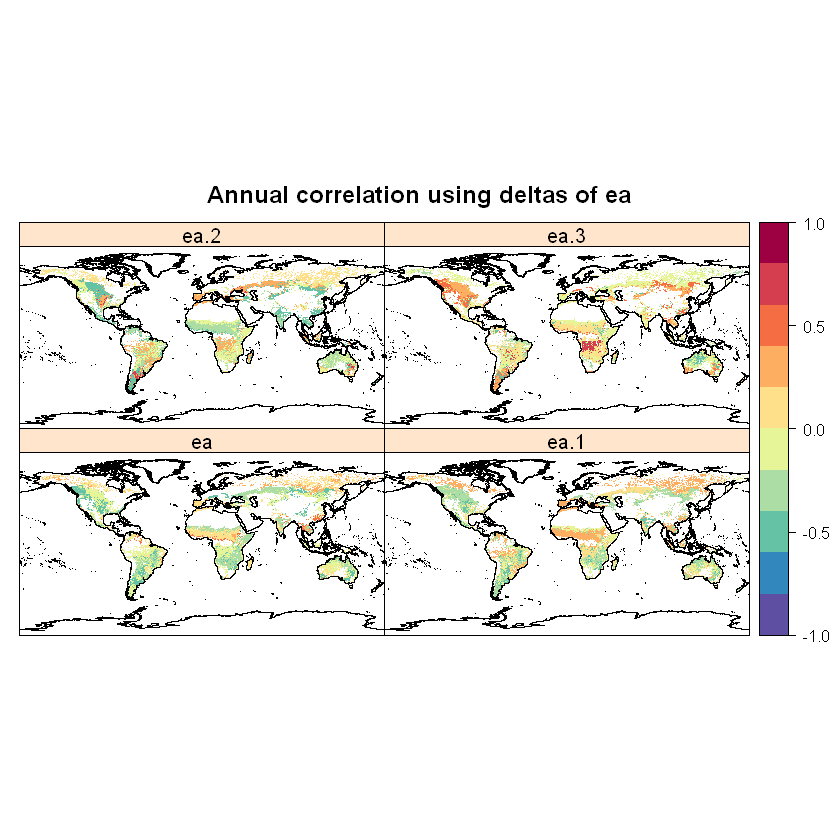

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

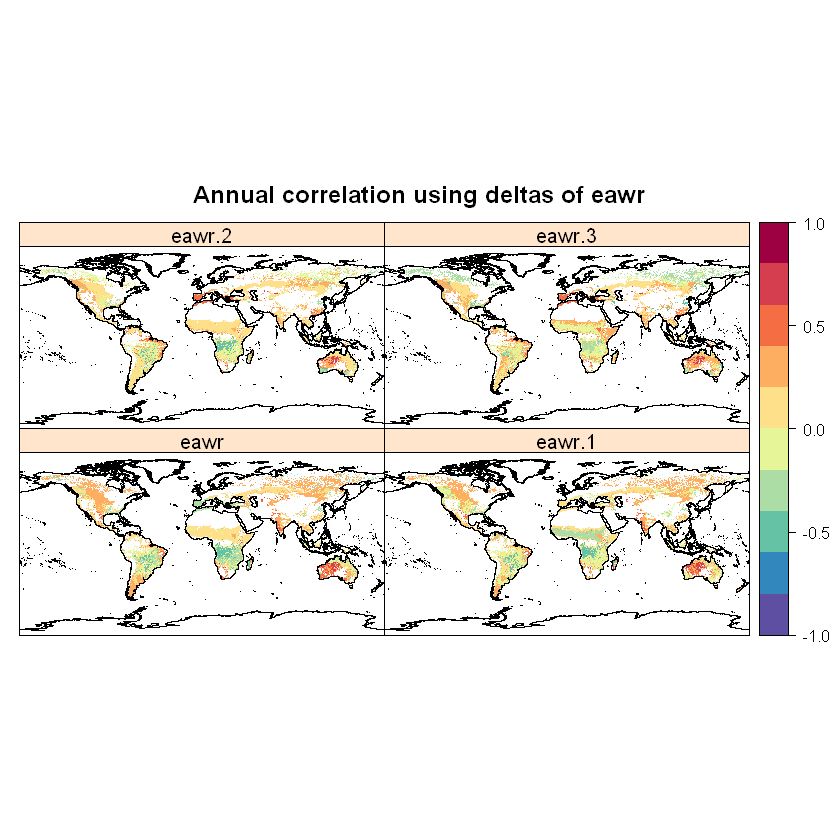

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

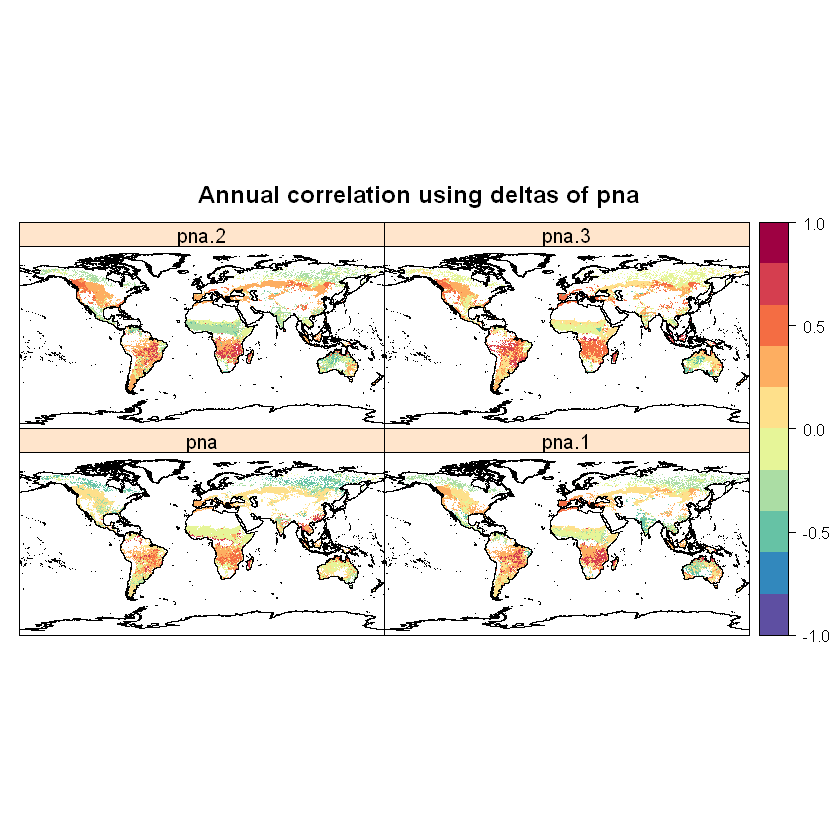

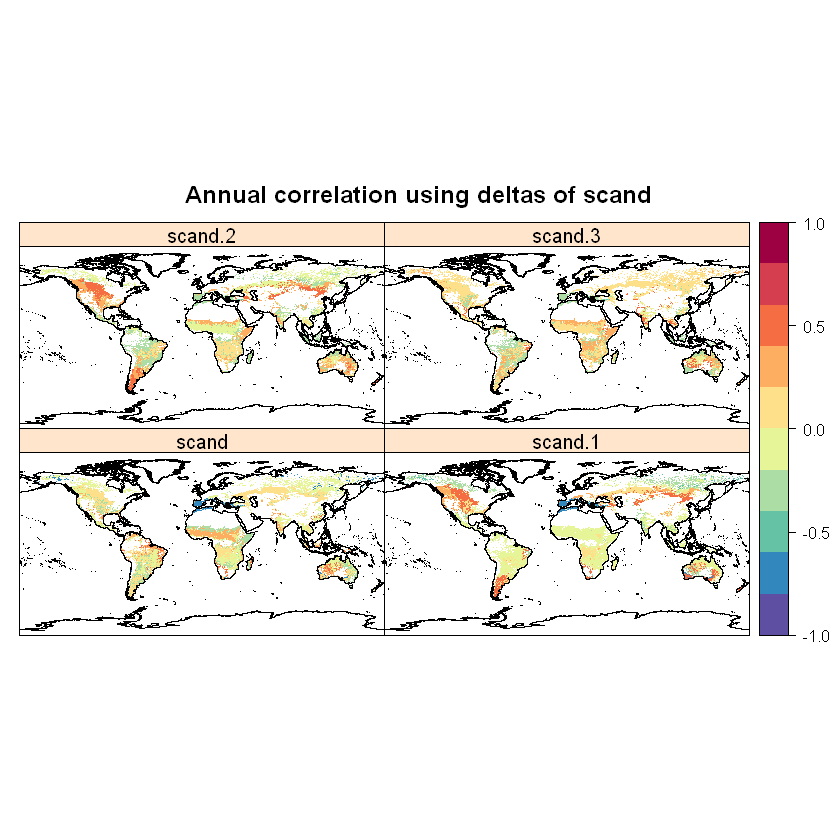

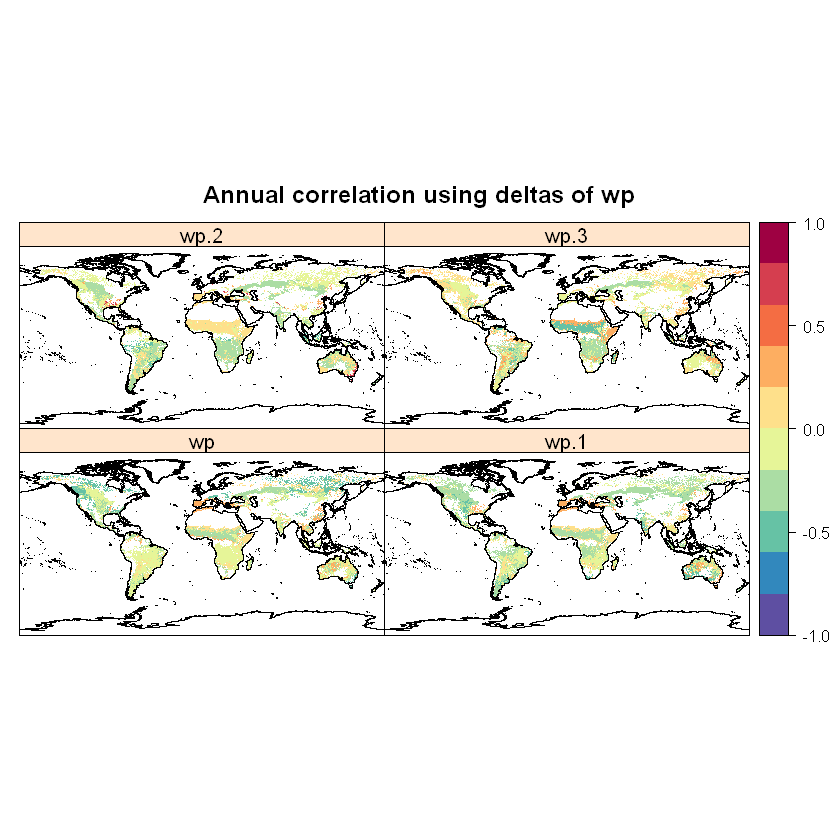

In [16]:
# correlation with deltas

names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')
for (i in 1:8){
    #pdf(paste('Figures/Figure11b_', names[i], '.pdf', sep =''))
    arg.list <- list(col.regions = brewer.pal(11, 'Spectral')[11:1][-6],
                          at = seq(-1, 1, 0.2))
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[["ylim"]] <- c(-90,90)
    arg.list[["xlim"]] <- c(-180,180)
    arg.list[['main']] = paste('Annual correlation using deltas of', names[i])
    df1 = masked_coords
    
    df1 <- cbind.data.frame(df1, corr.df.delta[2*i+1], corr.df.delta.1[2*i+1], corr.df.delta.2[2*i+1],
                            corr.df.delta.3[2*i+1])    
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    do.call("spplot", arg.list) %>% print()
    #dev.off()
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

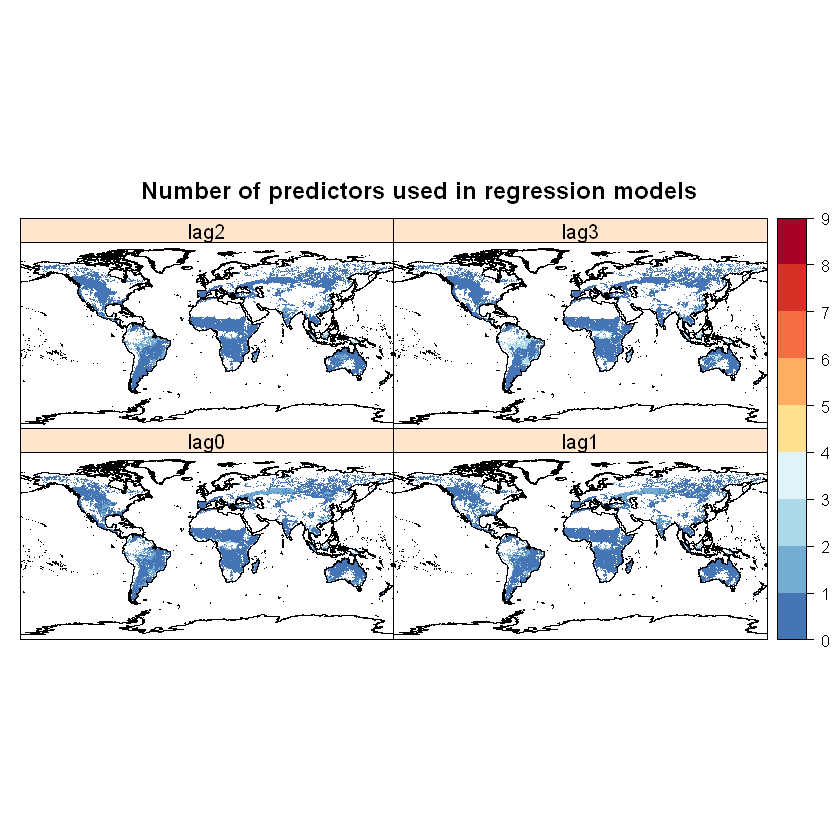

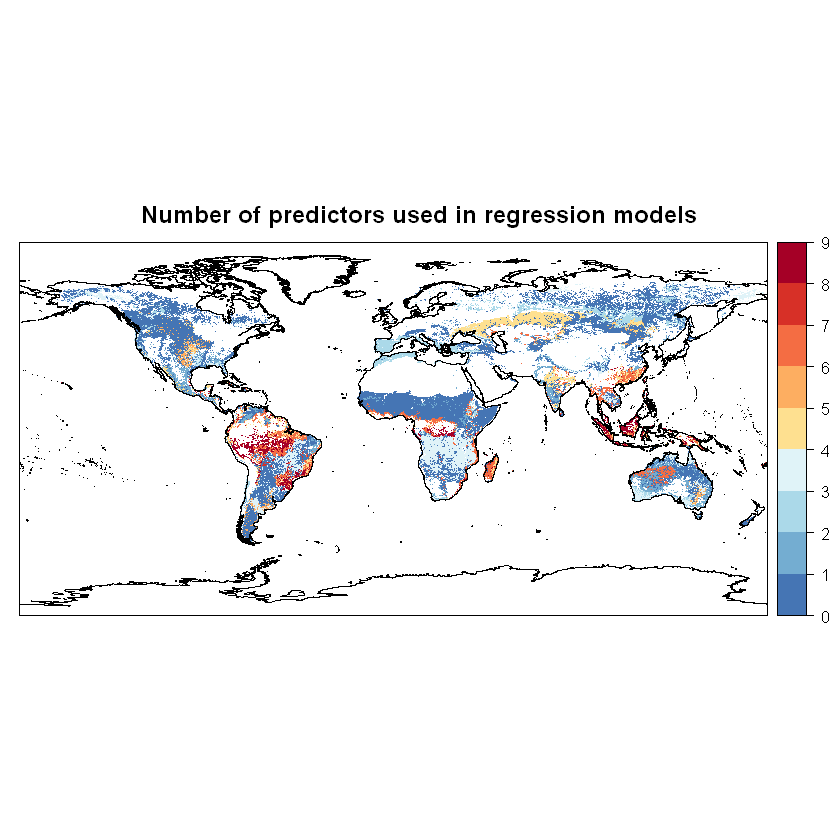

In [85]:
#pdf('Figures/Figure12_part1.pdf')
arg.list <- list(col.regions = rev(brewer.pal(11, 'RdYlBu'))[2:11],
                          at = seq(0, 9, 1))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)

v = cbind(as.numeric(corr.df.delta$nao.pvalue<0.05), as.numeric(corr.df.delta$poleur.pvalue<0.05),
          as.numeric(corr.df.delta$ea.pvalue<0.05), as.numeric(corr.df.delta$eawr.pvalue<0.05),
          as.numeric(corr.df.delta$pna.pvalue<0.05), as.numeric(corr.df.delta$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta$scand.pvalue<0.05), as.numeric(corr.df.delta$wp.pvalue<0.05))
lag0 = rowSums(v)
df1 <- cbind.data.frame(masked_coords, lag0)

v = cbind(as.numeric(corr.df.delta.1$nao.pvalue<0.05), as.numeric(corr.df.delta.1$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.1$ea.pvalue<0.05), as.numeric(corr.df.delta.1$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.1$pna.pvalue<0.05), as.numeric(corr.df.delta.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.1$scand.pvalue<0.05), as.numeric(corr.df.delta.1$wp.pvalue<0.05))
lag1 = rowSums(v)
df1 <- cbind.data.frame(df1, lag1)

v = cbind(as.numeric(corr.df.delta.2$nao.pvalue<0.05), as.numeric(corr.df.delta.2$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.2$ea.pvalue<0.05), as.numeric(corr.df.delta.2$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.2$pna.pvalue<0.05), as.numeric(corr.df.delta.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.2$scand.pvalue<0.05), as.numeric(corr.df.delta.2$wp.pvalue<0.05))
lag2 = rowSums(v)
df1 <- cbind.data.frame(df1, lag2)

v = cbind(as.numeric(corr.df.delta.3$nao.pvalue<0.05), as.numeric(corr.df.delta.3$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.3$ea.pvalue<0.05), as.numeric(corr.df.delta.3$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.3$pna.pvalue<0.05), as.numeric(corr.df.delta.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.3$scand.pvalue<0.05), as.numeric(corr.df.delta.3$wp.pvalue<0.05))
lag3 = rowSums(v)
df1 <- cbind.data.frame(df1, lag3)

lag0123 = lag0 + lag1 + lag2 + lag3
df1 <- cbind.data.frame(df1, lag0123)

coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["zcol"]] <- 1:4
arg.list[["obj"]] <- df1
arg.list[['main']] <- 'Number of predictors used in regression models'
do.call("spplot", arg.list) %>% print()
#dev.off()

#pdf('Figures/Figure12_part2.pdf')
arg.list[["zcol"]] <- 5
do.call("spplot", arg.list) %>% print()
#dev.off()

# Figure 13

In [63]:
get.table.violin.plot <- function(inds, name){
    names = c()
    names[inds[1]] = 'lm'
    names[inds[2]] = 'rf'
    names[inds[3]] = 'knn'
    Table = data.frame()
    for (i in c(inds[1], inds[2], inds[3])){
        table1 = table[,c(1,2,i)]
        colnames(table1) = c('biome', 'cluster', name)
        table1$method = paste(names[i], '_0', sep = '')

        table2 = table.deltas.Lag.1[,c(1,2,i)]
        colnames(table2) = c('biome', 'cluster', name)
        table2$method = paste(names[i], '_1', sep = '')

        table3 = table.deltas.Lag.2[,c(1,2,i)]
        colnames(table3) = c('biome', 'cluster', name)
        table3$method = paste(names[i], '_2', sep = '')

        table4 = table.deltas.Lag.3[,c(1,2,i)]
        colnames(table4) = c('biome', 'cluster', name)
        table4$method = paste(names[i], '_3', sep = '')

        table5 = table.deltas.Lag.0123[,c(1,2,i)]
        colnames(table5) = c('biome', 'cluster', name)
        table5$method = paste(names[i], '_0123', sep = '')

        Table = rbind(Table, table1, table2, table3, table4, table5)
    }
    Table$method = as.factor(Table$method)
    return (Table)
}

Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."

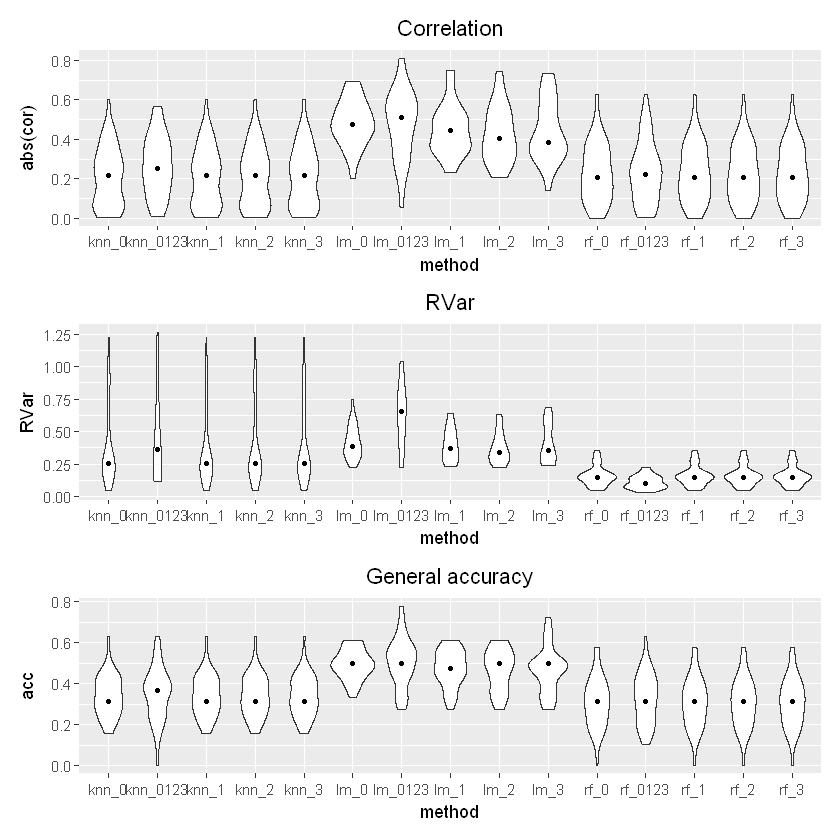

In [73]:
Table.cor <- get.table.violin.plot(c(8,20,30), 'cor')
Table.RVar <- get.table.violin.plot(c(6,18,28), 'RVar')
Table.acc <- get.table.violin.plot(c(9,21,31), 'acc')

l = list()
l[[1]] <- ggplot(Table.cor, aes(x=method, y=abs(cor))) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Correlation') + theme(plot.title = element_text(hjust = 0.5))
l[[2]] <- ggplot(Table.RVar, aes(x=method, y=RVar)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('RVar') + theme(plot.title = element_text(hjust = 0.5))
l[[3]] <- ggplot(Table.acc, aes(x=method, y=acc)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('General accuracy') + theme(plot.title = element_text(hjust = 0.5))
#pdf('Figures/Figure13_part1.pdf')
l[[1]] / l[[2]] / l[[3]]
#dev.off()

Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."Warning message:
"Removed 262 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 262 rows containing non-finite values (stat_summary)."

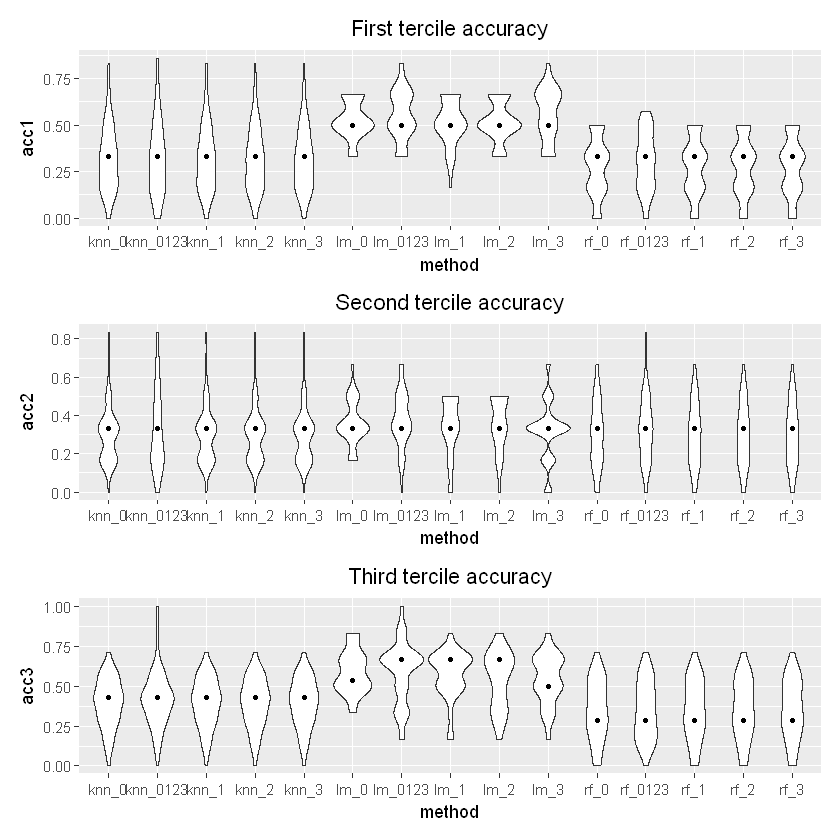

In [71]:
Table.acc1 <- get.table.violin.plot(c(10,22,32), 'acc1')
Table.acc2 <- get.table.violin.plot(c(11,23,33), 'acc2')
Table.acc3 <- get.table.violin.plot(c(12,24,34), 'acc3')

l = list()
l[[1]] <- ggplot(Table.acc1, aes(x=method, y=acc1)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('First tercile accuracy') + theme(plot.title = element_text(hjust = 0.5))
l[[2]] <- ggplot(Table.acc2, aes(x=method, y=acc2)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Second tercile accuracy') + theme(plot.title = element_text(hjust = 0.5))
l[[3]] <- ggplot(Table.acc3, aes(x=method, y=acc3)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Third tercile accuracy') + theme(plot.title = element_text(hjust = 0.5))
#pdf('Figures/Figure13_part2.pdf')
l[[1]] / l[[2]] / l[[3]]
#dev.off()